#                   FRAUD DETECTION


# Importiing Important Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Understanding your Data


In [3]:
df=pd.read_csv('Dataset/credit.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [26]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# LOGISTIC REGRESSION

In [27]:
# Sigmoid Function 
def sigmoid(z):
    exp_vals = np.exp(-np.abs(z))
    return np.where(z >= 0, 1 / (1 + exp_vals), exp_vals / (1 + exp_vals))


In [28]:
# Cost Function
def cost_function(X, y, m, c):
    n = len(y)
    z = np.dot(X, m) + c
    pred = sigmoid(z)
    pred = np.clip(pred, 1e-15, 1 - 1e-15)
    cost = -np.mean(y * np.log(pred) + (1 - y) * np.log(1 - pred))
    return cost

# Convergence Algorithm

In [29]:
def gradient_descent(X, y, m, c, alpha=0.002, num_iterations=10000):
    n = len(y)
    for i in range(num_iterations):
        z = np.dot(X, m) + c
        pred = sigmoid(z)
        gradient_m = np.dot(X.T, (pred - y)) / n
        gradient_c = np.mean(pred - y)
        m -= alpha * gradient_m
        c -= alpha * gradient_c
    return m, c

In [30]:
def result(x,m,c):
    ans=sigmoid(np.dot(x,m)+c)
    if(ans>=0.5):
        return int(1)
    else:
        return int(0)

# Model

In [31]:
X = df.drop('Class', axis=1).values
y = df['Class'].values

m = np.random.randn(X.shape[1])
c = 5

In [32]:
initial_cost = cost_function(X, y, m, c)
print("Initial Cost:", initial_cost)

m, c = gradient_descent(X, y, m, c)
print("Updated Slope Parameters (m):", m)
print("Updated Intercept Parameter (c):", c)

after_cost = cost_function(X, y, m, c)
print("The After Cost of the function:", after_cost)



Initial Cost: 34.45343261517768


Updated Slope Parameters (m): [-8.21187914e+01 -1.25719779e+00  8.82177147e-01 -5.30460851e-01
  1.20176573e+00 -2.18955607e+00  1.73140115e+00 -1.59945906e+00
  5.94446571e-02  2.23482426e+00  1.80833139e+00 -1.37743184e+00
 -1.12533154e-01  3.62550202e-01  2.15871901e-01  1.13214467e-01
  2.45620433e+00 -2.47377302e+00 -1.12779412e+00  1.41193134e+00
  2.27057786e-01  7.24402944e-01  1.31797281e-01 -1.56720974e+00
  3.62005038e-01  2.38414198e+00 -6.99665222e-01  1.83499182e+00
 -7.75155178e-01  1.30340365e+00]
Updated Intercept Parameter (c): 5.003650413819104
The After Cost of the function: 0.0600491544897489


# Accuracy


In [33]:
# For Accuracy:
def accuracy(x,y,m,c):
    acc=0
    n=x.shape
    n=n[0]
    for i in range(n):
        pred=result(x[i],m,c)
        if pred==y[i]:
            acc+=1
            
    return acc/len(x)*100



In [34]:
# accuracy of the model:
acc=accuracy(X,y,m,c)
print("accuracy of the model:",acc,"%")

accuracy of the model: 99.8258469770757 %


# Cunfusion Matrix:

In [35]:
# For better understanding the accuraccy of the model:
def false_neg(x,y,m,c):
    false_n=0
    n=x.shape
    n=n[0]
    for i in range(n):
        pred=result(x[i],m,c)
        if pred==0 and y[i]==1:
            false_n+=1
            
    return false_n/len(x)*100


def false_pos(x,y,m,c):
    false_p=0
    n=x.shape
    n=n[0]
    for i in range(n):
        pred=result(x[i],m,c)
        if pred==1 and y[i]==0:
            false_p+=1
            
    return false_p/len(x)*100
 
def true_pos(x,y,m,c):
    true_p=0
    n=x.shape
    n=n[0]
    for i in range(n):
        pred=result(x[i],m,c)
        if pred==1 and y[i]==1:
            true_p+=1
            
    return true_p/len(x)*100

def true_neg(x,y,m,c):
    true_n=0
    n=x.shape
    n=n[0]
    for i in range(n):
        pred=result(x[i],m,c)
        if pred==0 and y[i]==0:
            true_n+=1
            
    return true_n/len(x)*100


In [36]:
# False negative:
tp=true_pos(X,y,m,c)
print("True positive of the model:",tp,"%")

tn=true_neg(X,y,m,c)
print("True negative of the model:",tn,"%")

fn=false_neg(X,y,m,c)
print("False negative of the model:",fn,"%")

fp=false_pos(X,y,m,c)
print("False positive of the model:",fp,"%")


True positive of the model: 0.0 %
True negative of the model: 99.8258469770757 %
False negative of the model: 0.1727485630620034 %
False positive of the model: 0.0014044598622927106 %


# COMPARING WITH SKLEARN  LIBRARY

# LOGISTIC REGRESSION

In [5]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

# Scaling

In [6]:
# Test train split:
x_train,x_test,y_train,y_test=train_test_split(df.drop('Class',axis=1),df.Class,test_size=0.1)

# Scaling:
from sklearn.preprocessing import StandardScaler as ss
scaler=ss()
scaler.fit(x_train)

x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

# Training the model

In [39]:
lg=LogisticRegression(max_iter=10000)
model=lg.fit(x_train,y_train)

# Model

In [40]:
#Intercept Parameters
model.intercept_

array([-8.68304797])

In [41]:
#Coefficient Parameters
model.coef_

array([[-0.22165702,  0.19576511,  0.043182  , -0.02575036,  1.02574813,
         0.19449462, -0.15856773, -0.08743874, -0.21747873, -0.23431105,
        -0.89481956, -0.01401933,  0.07001612, -0.32975458, -0.51472442,
        -0.14353735, -0.05014151, -0.0709347 , -0.06703402,  0.12877843,
        -0.32962232,  0.29987931,  0.49548959, -0.05857577,  0.02913544,
        -0.05077008, -0.02022127, -0.2951809 , -0.09217325,  0.22429126]])

# Accuracy

In [42]:
model.score(x_test,y_test)

0.9991924440855307

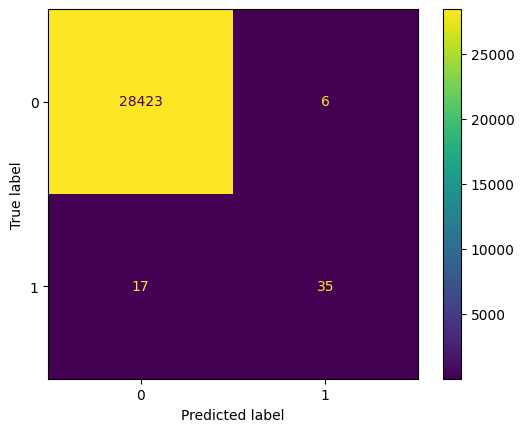

In [43]:
#Confusion Matrix:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred=model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
unique_labels = sorted(set(y_test))

disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=unique_labels)
disp.plot()
plt.show()

# F-1 Score

In [44]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print("F1 score:", f1)

F1 score: 0.7526881720430108


# Importing as pickle

In [45]:
# To save the model using pickle:-
import pickle 

In [46]:
# Creates a new file:-
with open('model_pickle','wb') as f:
    pickle.dump(model,f)

# USING DECISION TREE

In [47]:
from sklearn.tree import DecisionTreeClassifier

# Training the Model

In [48]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [49]:
y_pred_dt = decision_tree.predict(x_test)

# Accuracy

In [50]:
decision_tree.score(x_test, y_test)

0.9989817773252344

In [51]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
unique_labels_dt = sorted(set(y_test))


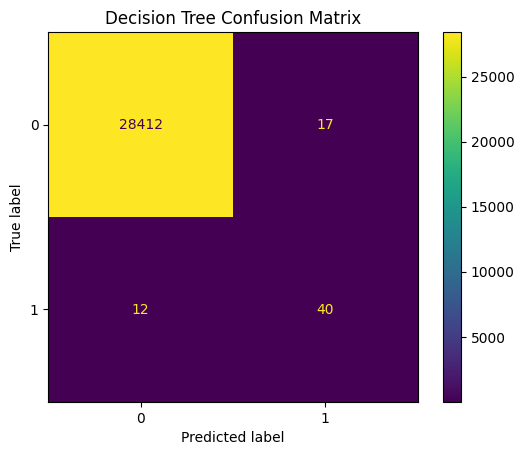

In [52]:
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=unique_labels_dt)
disp_dt.plot()
plt.title('Decision Tree Confusion Matrix')
plt.show()

# F-1 Score

In [53]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred_dt)

print("F1 score:", f1)

F1 score: 0.7339449541284404


# Importing as Pickle

In [54]:
# To save the model using pickle:-
import pickle 

In [55]:
# Creates a new file:-
with open('model_pickle_DT','wb') as f:
    pickle.dump(model,f)

# USING NEURAL NETWORK:

# Training the Model

In [102]:
from sklearn.neural_network import MLPClassifier  as mlpc
MLP=mlpc(hidden_layer_sizes=(100,100,100,100),max_iter=10000)
MLP.fit(x_train,y_train)


MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100), max_iter=10000)

In [103]:
y_pred_MLP=MLP.predict(x_test)

# Accuracy

In [104]:
MLP.score(x_test,y_test)

0.9994733330992591

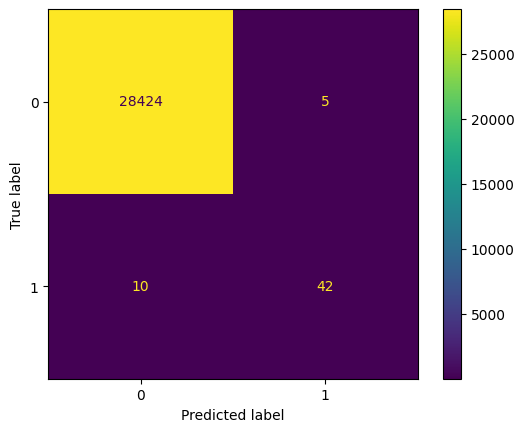

In [105]:
#Confusion Matrix:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred=model.predict(x_test)

cm = confusion_matrix(y_test, y_pred_MLP)
unique_labels_MLP= sorted(set(y_test))

disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=unique_labels_MLP)
disp.plot()
plt.show()

# F-1 Score

In [106]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred_MLP)

print("F1 score:", f1)

F1 score: 0.8484848484848485


# Importing as Pickle

In [107]:
# To save the model using pickle:-
import pickle 

In [ ]:
# Creates a new file:-
with open('Pickle/model_pickle_MLP','wb') as f:
    pickle.dump(model,f)

## Using Tensorflow


In [3]:
!pip install tensorflow

   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.8/390.3 MB 4.8 MB/s eta 0:01:21
   ---------------------------------------- 1.6/390.3 MB 4.4 MB/s eta 0:01:29
   ---------------------------------------- 2.4/390.3 MB 4.3 MB/s eta 0:01:30
   ---------------------------------------- 3.4/390.3 MB 4.3 MB/s eta 0:01:31
   ---------------------------------------- 4.2/390.3 MB 4.2 MB/s eta 0:01:32
    --------------------------------------- 5.0/390.3 MB 4.2 MB/s eta 0:01:32
    --------------------------------------- 6.0/390.3 MB 4.2 MB/s eta 0:01:31
    --------------------------------------- 6.8/390.3 MB 4.2 MB/s eta 0:01:33
    --------------------------------------- 7.3/390.3 MB 3.9 MB/s eta 0:01:38
    --------------------------------------- 8.1/390.3 MB 4.1 MB/s eta 0:01:35
    --------------------------------------- 8.4/390.3 MB 3.8 MB/s eta 0:01:40
    --------------------------------------- 9.4/390.3 MB 3.8 MB/s eta 0


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout,BatchNormalization, LeakyReLU


In [14]:
x_train.shape

(256326, 30)

In [15]:
# Build the model
model = Sequential([
    Dense(128, input_shape=(x_train.shape[1],)), 
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),  

    Dense(64),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),

    Dense(32),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.2), 

    Dense(1, activation='sigmoid') 
])

c:\Users\AKHILESH\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\AKHILESH\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [17]:
from tensorflow.keras.callbacks import EarlyStopping

# Define Early Stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10,          
    restore_best_weights=True 
)


In [18]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
history = model.fit(
    x_train, y_train,
    validation_split=0.2, 
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping]  
)

Epoch 1/100
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9416 - loss: 0.1223 - val_accuracy: 0.9994 - val_loss: 0.0057
Epoch 2/100
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9991 - loss: 0.0051 - val_accuracy: 0.9994 - val_loss: 0.0043
Epoch 3/100
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9993 - loss: 0.0039 - val_accuracy: 0.9994 - val_loss: 0.0046
Epoch 4/100
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9993 - loss: 0.0037 - val_accuracy: 0.9994 - val_loss: 0.0049
Epoch 5/100
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9994 - loss: 0.0032 - val_accuracy: 0.9994 - val_loss: 0.0045
Epoch 6/100
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9993 - loss: 0.0032 - val_accuracy: 0.9994 - val_loss: 0.0046
Epoch 7/100
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9994 - loss: 0.0028 - val_accuracy: 0.9993 - val_loss: 0.0045
Epoch 8/100
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9993 -

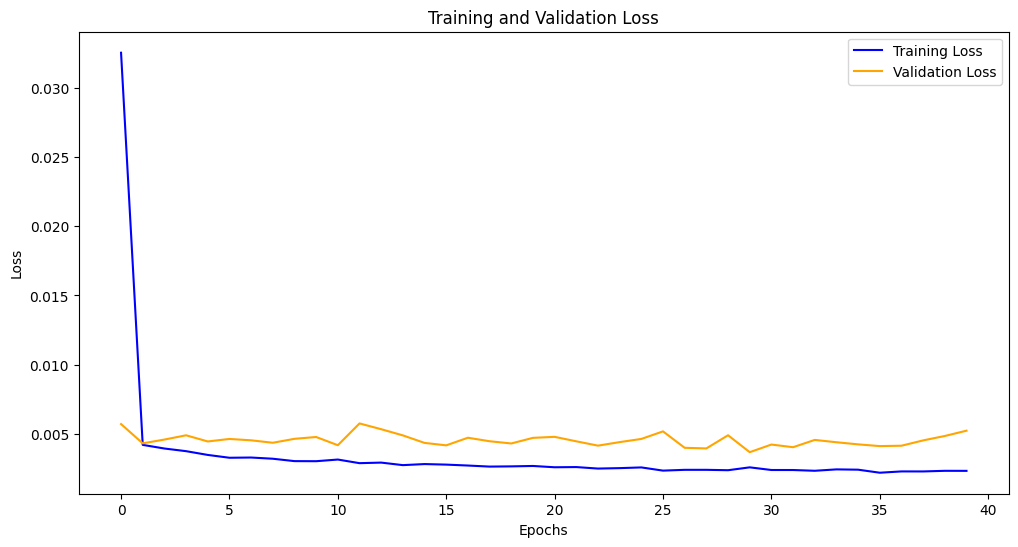

In [20]:
# Extract the training history
history_dict = history.history

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history_dict['loss'], label='Training Loss', color='blue')
plt.plot(history_dict['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


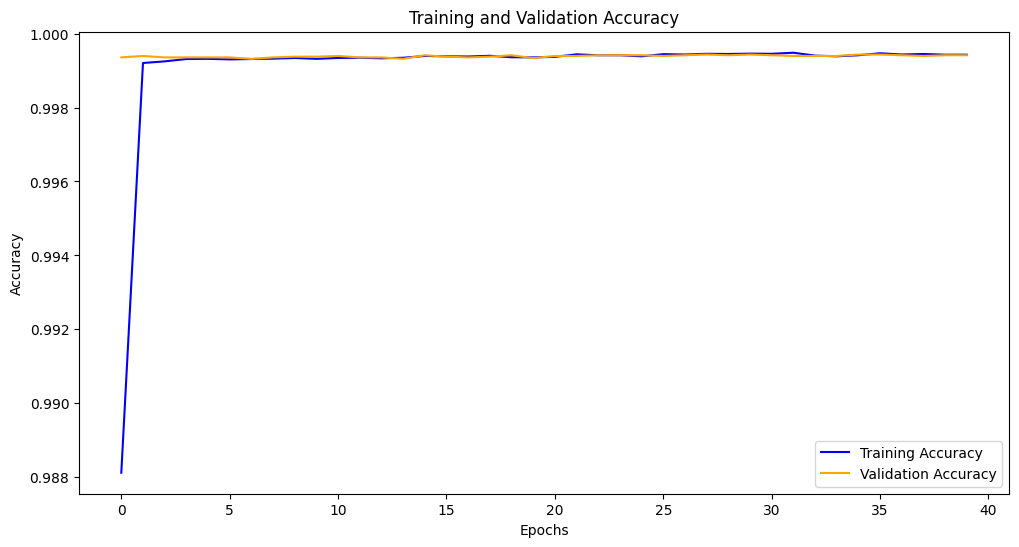

In [21]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history_dict['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [25]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9996 - loss: 0.0014
Validation Loss: 0.0017447264399379492
Validation Accuracy: 0.9995786547660828


In [26]:
import pickle
from tensorflow.keras.models import load_model

# Save the model as an HDF5 file
model.save("model.h5")  # Saves the model in HDF5 format

# Save the file path using pickle
with open("model_pickle_tf.pkl", "wb") as f:
    pickle.dump("model.h5", f)

print("Model saved as 'model.h5' and referenced in 'model_pickle_tf.pkl'")


Model saved as 'model.h5' and referenced in 'model_pickle_tf.pkl'
